1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty) - DONE
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [30]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import scipy
import pandas as pd
import seaborn as sbrn


In [3]:
N = 200
mean = 0
std_dev = 3
data = npr.normal(loc=mean, scale=std_dev, size=N)

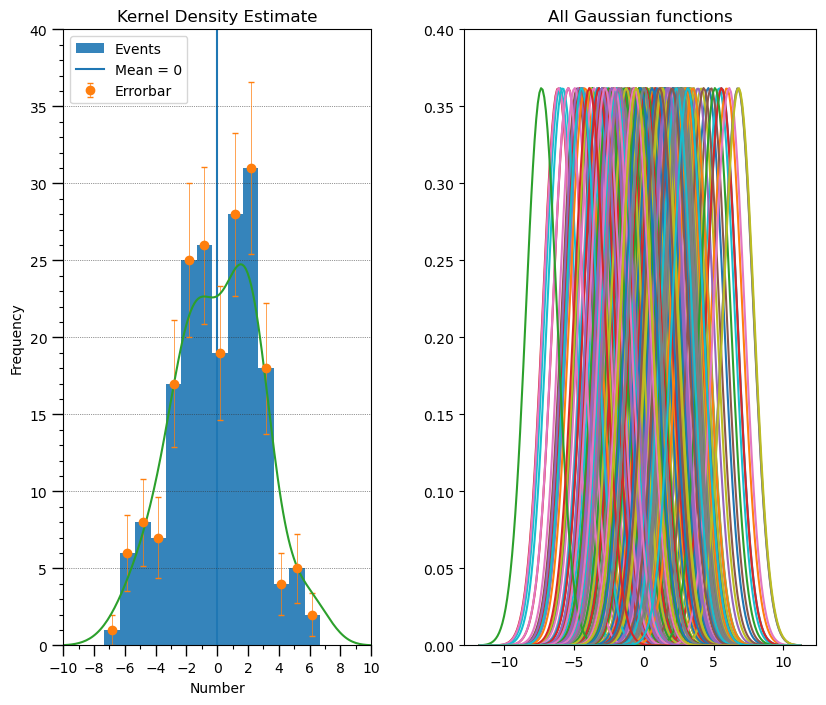

In [61]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,2,1, aspect=1)
counts,bin_edges,_ =ax.hist(data, bins= np.arange(data.min(),data.max(), 1), label='Events', alpha=0.9)

def minor_tick(x, pos):
    return f"%0.f"%x

bin_center = (bin_edges[:-1] + bin_edges[1:])/2
poissonian_uncertainty = np.sqrt(counts)
#ax.plot(bin_center, counts,'o', label='Scatter')
ax.errorbar(bin_center, counts, xerr=None, yerr=poissonian_uncertainty,fmt='o',capsize=2,elinewidth=0.5, label='Errorbar')
ax.axvline(mean, label=f'Mean = {mean}', zorder=-100)

ax.xaxis.set_major_locator(MultipleLocator(2))
#ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
#ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(-10,10)
ax.set_ylim(0,40)

ax.tick_params(which='major', width=1, length=8)
ax.tick_params(which='minor', width=0.8, length=3)

ax.grid(axis ='y', which='major',linestyle='dotted', linewidth=0.5, color='0.2', zorder=-1000)

ax.set_title("Kernel Density Estimate")
ax.set_xlabel("Number")
ax.set_ylabel('Frequency')
ax.legend()

ax2 = fig.add_subplot(1,2,2, aspect='auto')
resolution = 200
x_ax2 = np.linspace(data.min()-4*std_value, data.max()+4*std_value, resolution)
gauss_sums = np.zeros(resolution)
for value in data:
    gaussian_norm = scipy.stats.norm.pdf(x_ax2,loc=value,scale = std_value)
    ax2.plot(x_ax2, gaussian_norm)
    gauss_sums += gaussian_norm

ax2.set_ylim(0,0.4)
ax2.set_title('All Gaussian functions')
original_int = scipy.integrate.trapezoid(counts, (bin_edges[1:] + bin_edges[:-1])/2)
sum_int= scipy.integrate.trapezoid(gauss_sums, x_ax2)
norm_gauss = gauss_sums*(original_int/sum_int)
ax.plot(x_ax2, norm_gauss, label='Sum of gaussians')

In [1]:
#THIS ONE IS WORSE
#fig, ax = plt.subplots(figsize=(8,6))
#ax.hist(data, bins= np.arange(data.min(),data.max(), 1), label='Events', alpha=0.9)
#counts, bin_edges , _ =ax.hist(data, bins= np.arange(data.min(),data.max(), 1), label='Events', alpha=0.9)
#bin_center = (bin_edges[:-1] + bin_edges[1:])/2
#poissonian_uncertainty = np.sqrt(counts)
#ax.plot(bin_center, counts,'o', label='Scatter')
#ax.errorbar(bin_center, counts, xerr=None, yerr=poissonian_uncertainty,fmt='o', label='Errorbar')
#ax.axvline(mean, label='Mean = 1')
#ax.legend(loc=(0.1,0.8))
#ax.set_xlabel('')
#ax.set_ylabel('Frequency')
#ax.set_title('Histogram of a normalized distribution')
#ax.xaxis.set_major_locator(MultipleLocator(2))
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))
#ax.yaxis.set_major_locator(MultipleLocator(2))


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2025-01-08 11:35:03--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/70o67xqfkicx6o3pofl37/two_categories_scatter_plot.png?rlkey=b1wnq5kkwhthz0cevmq0mxf35 [following]
--2025-01-08 11:35:03--  https://www.dropbox.com/scl/fi/70o67xqfkicx6o3pofl37/two_categories_scatter_plot.png?rlkey=b1wnq5kkwhthz0cevmq0mxf35
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucec2dac4a4f425d9d5fc4a56343.dl.dropboxusercontent.com/cd/0/inline/ChyZe0gauX14lTZ-cLmXTeV8ltAPxbs5Nzzc3gtG_u-VdYyIN82cCKVjSKx32B2QND0JccvS5LzNoEIiplzrEQ8oOBH9uYKl_x-NpRS5CNoCJHuHOBqnGuAPhVcoELL_A8g/file# [following]
--2025-01-08 11:35:04--  https://ucec2dac4a4f425d9d5fc4a56343.

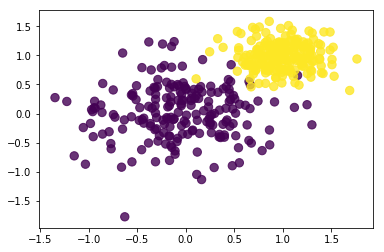

In [62]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png#
from IPython.display import Image
Image('two_categories_scatter_plot.png')

/tmp/ipykernel_49779/1964286961.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  a = npr.multivariate_normal((m1a,m1b), cov1, N)
/tmp/ipykernel_49779/1964286961.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  b = npr.multivariate_normal((m2a,m2b), cov2, N)


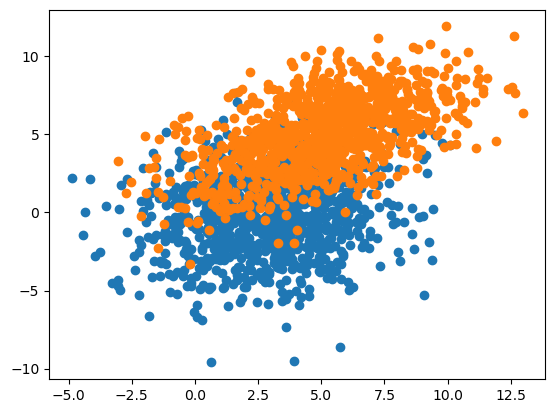

In [60]:
def function(m1a,m1b,m2a,m2b,std2a,st2b,std1a,std1b,N):
    cov1 =[std1a**2,std1a*std1b],[std1b*std1a]
    cov2 = npr.randint(0, 2*max(m1a,m1b,m2a,m2b), (2,2))
    a = npr.multivariate_normal((m1a,m1b), cov1, N)
    b = npr.multivariate_normal((m2a,m2b), cov2, N)
    return a, b

dataA, dataB = function(3,0,5,5,1, 1000)
plt.plot(dataA[:,0],dataA[:,1],'o')
plt.plot(dataB[:,0], dataB[:,1], 'o')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [2]:
#! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy


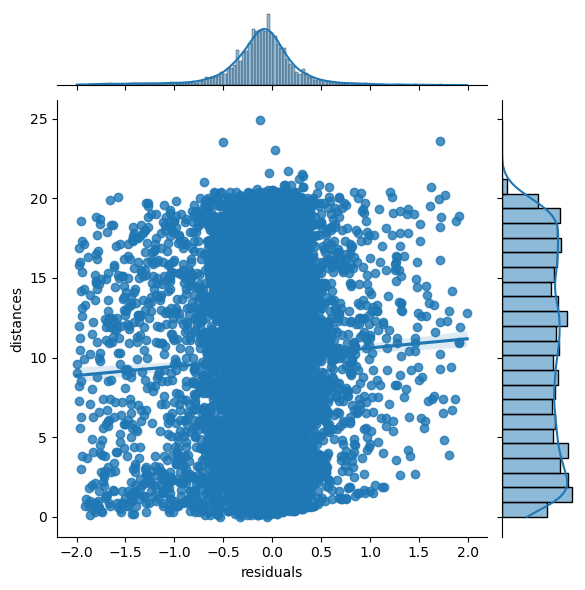

In [47]:
path = '/home/gigi/LaboratoryOfComputationalPhysics_Y7/residuals_261.npy'
data = np.load(path, allow_pickle=True)
df = pd.DataFrame(data.item())
df = df[abs(df.residuals)<=2]
slope, intercept, rvalue, pvalue, std = scipy.stats.linregress(df.residuals,df.distances)
sbrn.jointplot(df,x='residuals',y='distances',kind='reg')